<a href="https://colab.research.google.com/github/rainmaker29/ML701_G12/blob/CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

In [ ]:
import os
import cv2
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import  Sequence

In [ ]:
# Reading the data from the zip file. The train_.zip compressed file should be uploaded into this notebook in order to run the rest of the cells

with zipfile.ZipFile("/content/train_.zip", "r") as zip_data:
    content_list = zip_data.namelist()
    labels = []
    for folder in ['train_/GALAXY/', 'train_/STAR/', 'train_/QSO/']:
        content_list.remove(folder) # Removing the name of the folders
    for _, name_file in enumerate(content_list):
        img_bytes = zip_data.open(name_file)
        img_data = Image.open(img_bytes) # Opening the image file
        image_as_array = np.array(img_data, np.uint8)
        if _ == 0:
            data = image_as_array[np.newaxis, :] # Creates the matrix of images at the beginning
        else:
            data = np.concatenate((data, image_as_array[np.newaxis, :])) # Concatenates images
        # Appending the corresponding label for the current object
        if 'GALAXY' in name_file:
            labels.append('GALAXY')
        elif 'QSO' in name_file:
            labels.append('QSO')
        elif 'STAR' in name_file:
            labels.append('STAR')

In [ ]:
# Saving the data

#with h5py.File('images_matrix.h5', 'w') as hf:
#    hf.create_dataset("images_matrix",  data=x)

#with h5py.File('labels.h5', 'w') as hf:
#    hf.create_dataset("labels",  data=y)

In [ ]:
# Reading the data

#with h5py.File('images_matrix.h5', 'r') as hf:
#    data = hf['images_matrix'][:]

#with h5py.File('labels.h5', 'r') as hf:
#    labels = hf['labels.h5'][:]

In [ ]:
# Shuffling the data

labels = np.array(labels)

shuffler = np.random.RandomState(seed=10).permutation(data.shape[0]) # Used to shuffle the data since the order of the images is sorted

y_not_encoded = labels[shuffler]
y = np.unique(y_not_encoded, return_inverse=True)[1] # Converting the labels from strings to numbers

x = data[shuffler]
x = x.astype('float32')
x /= 255 # Normalize the pixel values from 0 to 1

In [ ]:
# Splitting the data on train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size = 0.2)

# Encoding the labels
n_classes = 3
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 128, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(3, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test),)

Epoch 1/10
63/63 [==============================] - 35s 367ms/step - loss: 0.4925 - accuracy: 0.8129 - val_loss: 0.2934 - val_accuracy: 0.9005
Epoch 2/10
63/63 [==============================] - 20s 311ms/step - loss: 0.2575 - accuracy: 0.9110 - val_loss: 0.2710 - val_accuracy: 0.9130
Epoch 3/10
63/63 [==============================] - 20s 316ms/step - loss: 0.1917 - accuracy: 0.9391 - val_loss: 0.2279 - val_accuracy: 0.9235
Epoch 4/10
63/63 [==============================] - 20s 323ms/step - loss: 0.1736 - accuracy: 0.9404 - val_loss: 0.2128 - val_accuracy: 0.9430
Epoch 5/10
63/63 [==============================] - 21s 330ms/step - loss: 0.1558 - accuracy: 0.9501 - val_loss: 0.2778 - val_accuracy: 0.9010
Epoch 6/10
63/63 [==============================] - 21s 331ms/step - loss: 0.1375 - accuracy: 0.9553 - val_loss: 0.2680 - val_accuracy: 0.9035
Epoch 7/10
63/63 [==============================] - 20s 325ms/step - loss: 0.1286 - accuracy: 0.9570 - val_loss: 0.2304 - val_accuracy: 0.9330

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 50)      1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 75)      33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 125)      0         
 2D)                                                    

In [ ]:
y_pred = model.predict(x_test)

y_pred_int = np.argmax(y_pred, axis=1)
y_test_int = np.argmax(y_test, axis=1)

result = confusion_matrix(y_test_int, y_pred_int, normalize='pred')

63/63 [==============================] - 3s 30ms/step


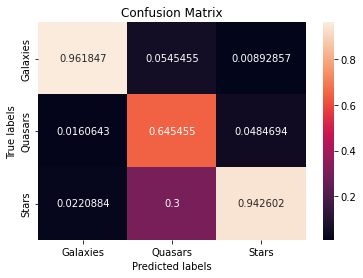

In [ ]:
ax= plt.subplot()
sns.heatmap(result, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Galaxies', 'Quasars', 'Stars']); ax.yaxis.set_ticklabels(['Galaxies', 'Quasars', 'Stars']);

In [ ]:
print(classification_report(y_test_int, y_pred_int, target_names=['Galaxies', 'Quasars', 'Stars']))

              precision    recall  f1-score   support

    Galaxies       0.96      0.98      0.97       977
     Quasars       0.65      0.72      0.68       196
       Stars       0.94      0.89      0.92       827

    accuracy                           0.92      2000
   macro avg       0.85      0.87      0.86      2000
weighted avg       0.92      0.92      0.92      2000

